# Second pass

> Second pass at looking at this dataset.

In [ ]:
#| hide
from IPython.display import YouTubeVideo

In [ ]:
#| hide
from nbdev.showdoc import *

## Imports

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm

register_matplotlib_converters()
import seaborn as sns
from IPython.display import Markdown, display


from ydata_profiling import ProfileReport

from matplotlib.ticker import FuncFormatter

In [ ]:
sns.set()
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

dollar_formatter = FuncFormatter(lambda x, pos: f"${x:,.0f}")
thousands_formatter = FuncFormatter(lambda x, pos: f"{x:,.0f}")

## Functions

In [ ]:
def raw_to_clean(raw):
    return (
        raw.assign(Major=lambda x: x.Major.str.title())
    )

def plot_median_histogram(df, bins=20):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('w')
    sns.histplot(df['Median'], ax=ax)
    ax.xaxis.set_major_formatter(dollar_formatter)
    ax.set_xlabel("Median Salary")
    ax.set_ylabel("Counts")
    ax.set_title('Distribution of Median Salaries')
    fig.tight_layout()


def plot_median_salary_boxplot(df):
    order = df.groupby('Major_category')['Median'].median().sort_values(ascending=False).index
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('w')
    sns.boxplot(x='Median', y='Major_category', data=df, ax=ax, order=order)
    ax.xaxis.set_major_formatter(dollar_formatter)
    fig.tight_layout()


def plot_top_n_salaries(df, n, sample_size_threshold):
    filtered_df = df[df['Sample_size'] >= sample_size_threshold]
    top_n = filtered_df.nlargest(n, 'Median').sort_values('Median', ascending=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('w')
    
    ax.errorbar(top_n['Median'], 
                top_n['Major'], 
                xerr=[top_n['Median']-top_n['P25th'], 
                      top_n['P75th']-top_n['Median']], 
                fmt='o', 
                color='black', 
                ecolor='lightgray', 
                elinewidth=3, 
                capsize=0)
    
    ax.set_xlabel('Salary')
    ax.set_ylabel('Major')
    ax.xaxis.set_major_formatter(dollar_formatter)
    ax.set_title('Top ' + str(n) + ' Highest Median Salaries by Major')
    fig.tight_layout()

def plot_major_popularity(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('w')

    major_popularity = df.groupby('Major_category')['Total'].sum().reset_index()
    major_popularity['Total'] = major_popularity['Total'] / 1000  # Scaling down by 1000
    major_popularity = major_popularity.sort_values(by='Total', ascending=False)

    sns.barplot(x='Total', y='Major_category', data=major_popularity, ax=ax)
    ax.set_title('Popularity of Each Major Category')
    ax.set_xlabel('Total Number of Students (in thousands)')
    ax.set_ylabel('Major Category')
    ax.xaxis.set_major_formatter(thousands_formatter)
    fig.tight_layout()



## Data

In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")

### Cleaning

In [ ]:
df = raw_to_clean(raw)

In [ ]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,Petroleum Engineering,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,1849,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,Mining And Mineral Engineering,756.0,679.0,77.0,Engineering,0.1019,7,640,556,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,Metallurgical Engineering,856.0,725.0,131.0,Engineering,0.1530,3,648,558,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,Naval Architecture And Marine Engineering,1258.0,1123.0,135.0,Engineering,0.1073,16,758,1069,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,23170,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972


## Data Visualization Plots

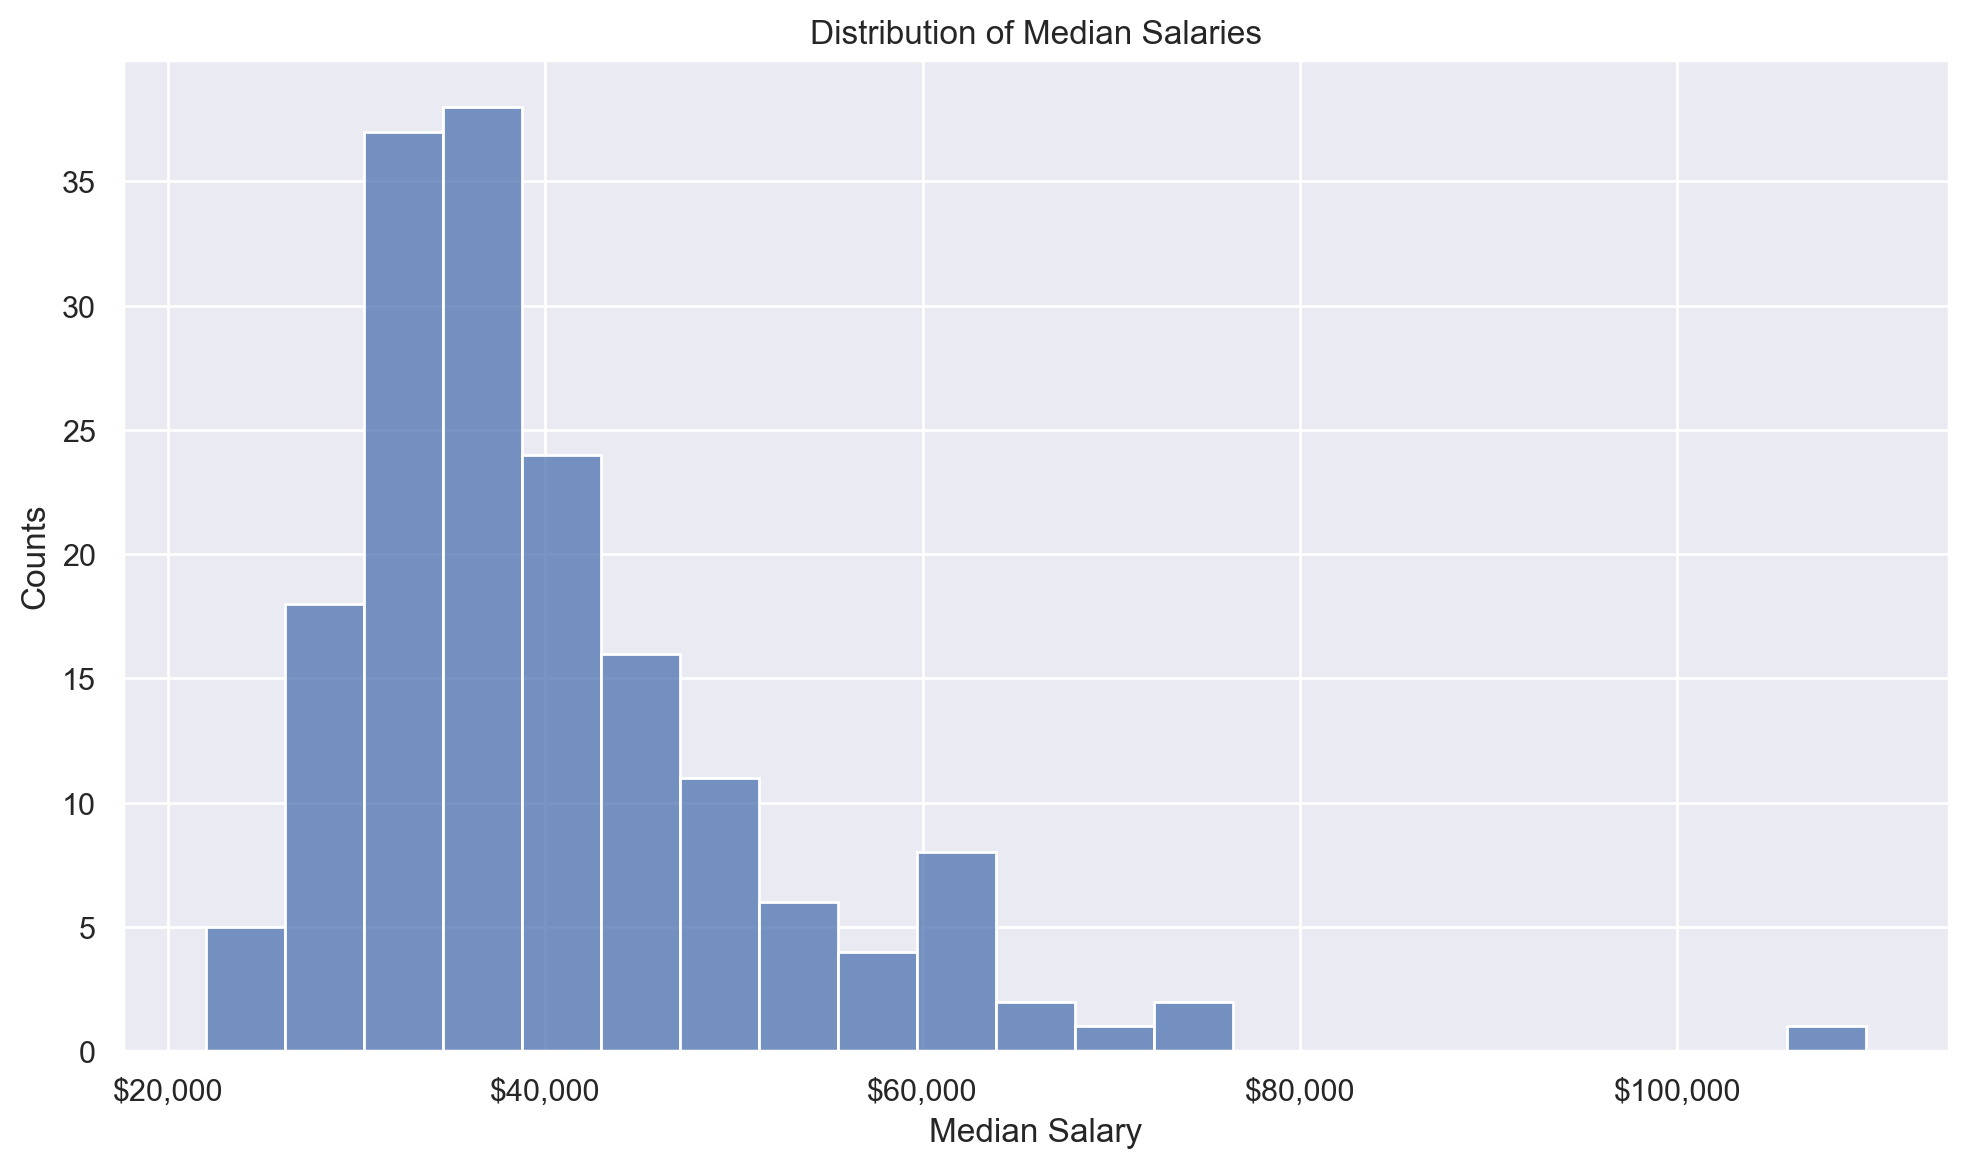

In [ ]:
plot_median_histogram(df, bins=25)

## Box plot of salaries groupby major category

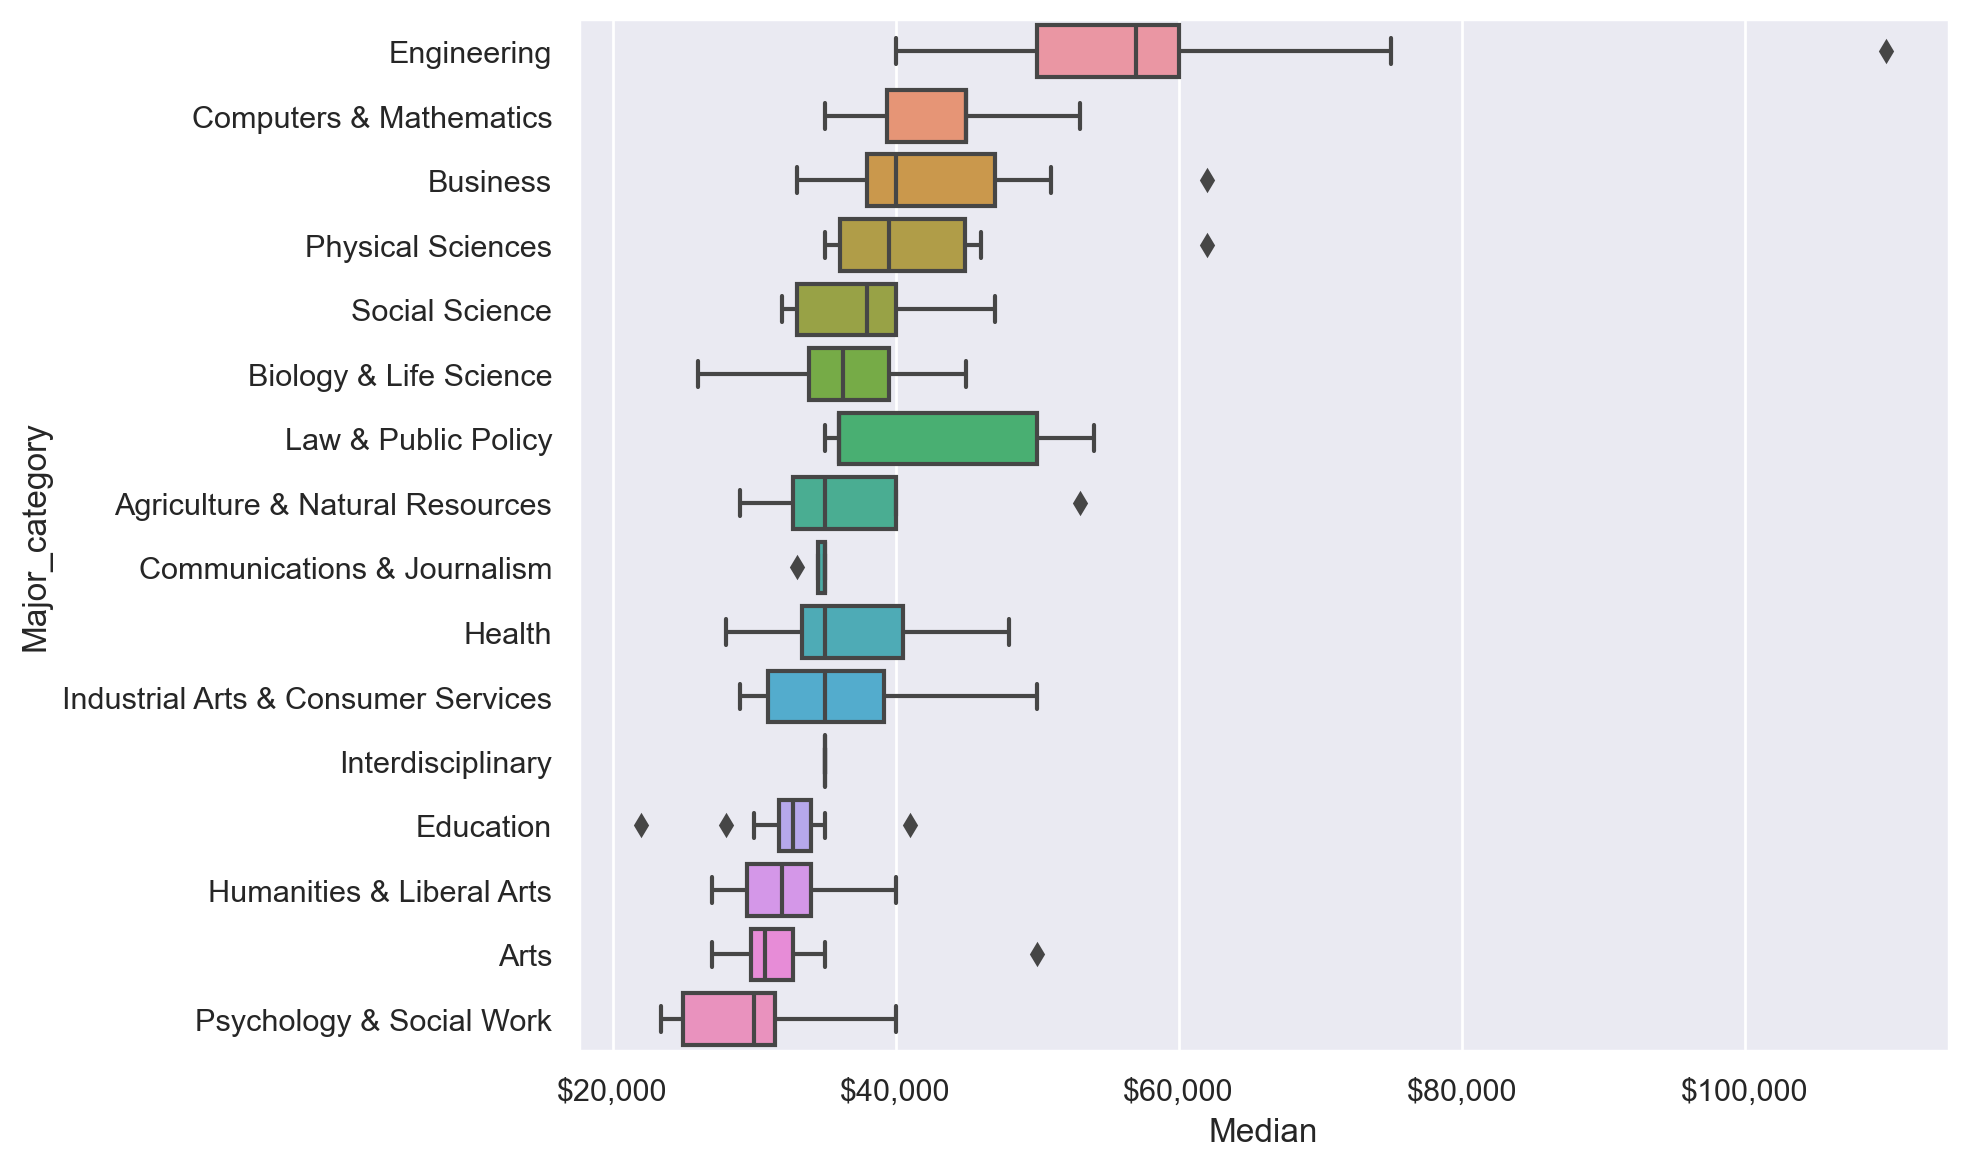

In [ ]:
plot_median_salary_boxplot(df)


### Popularity of each Major Category

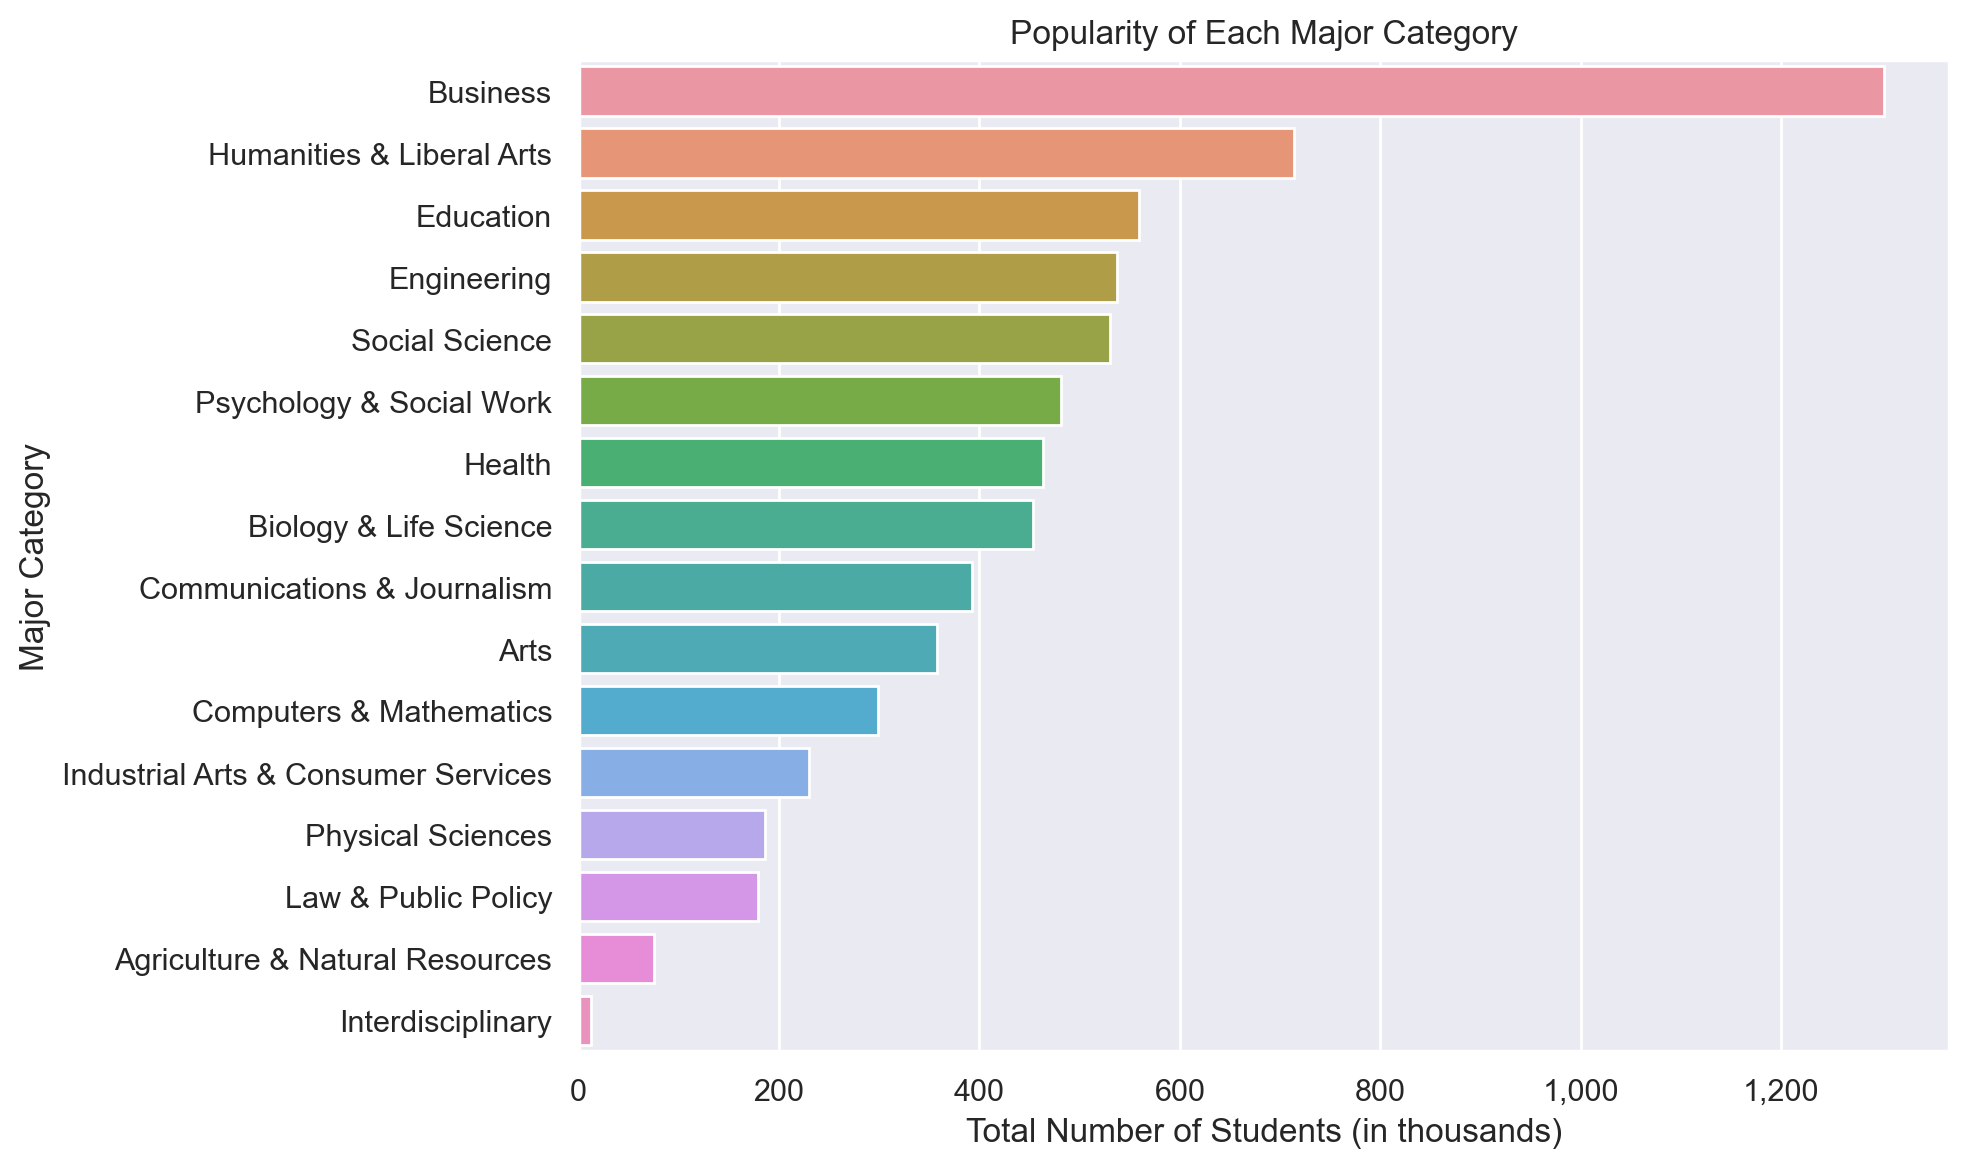

In [ ]:
plot_major_popularity(df)

### Top N Median salaries

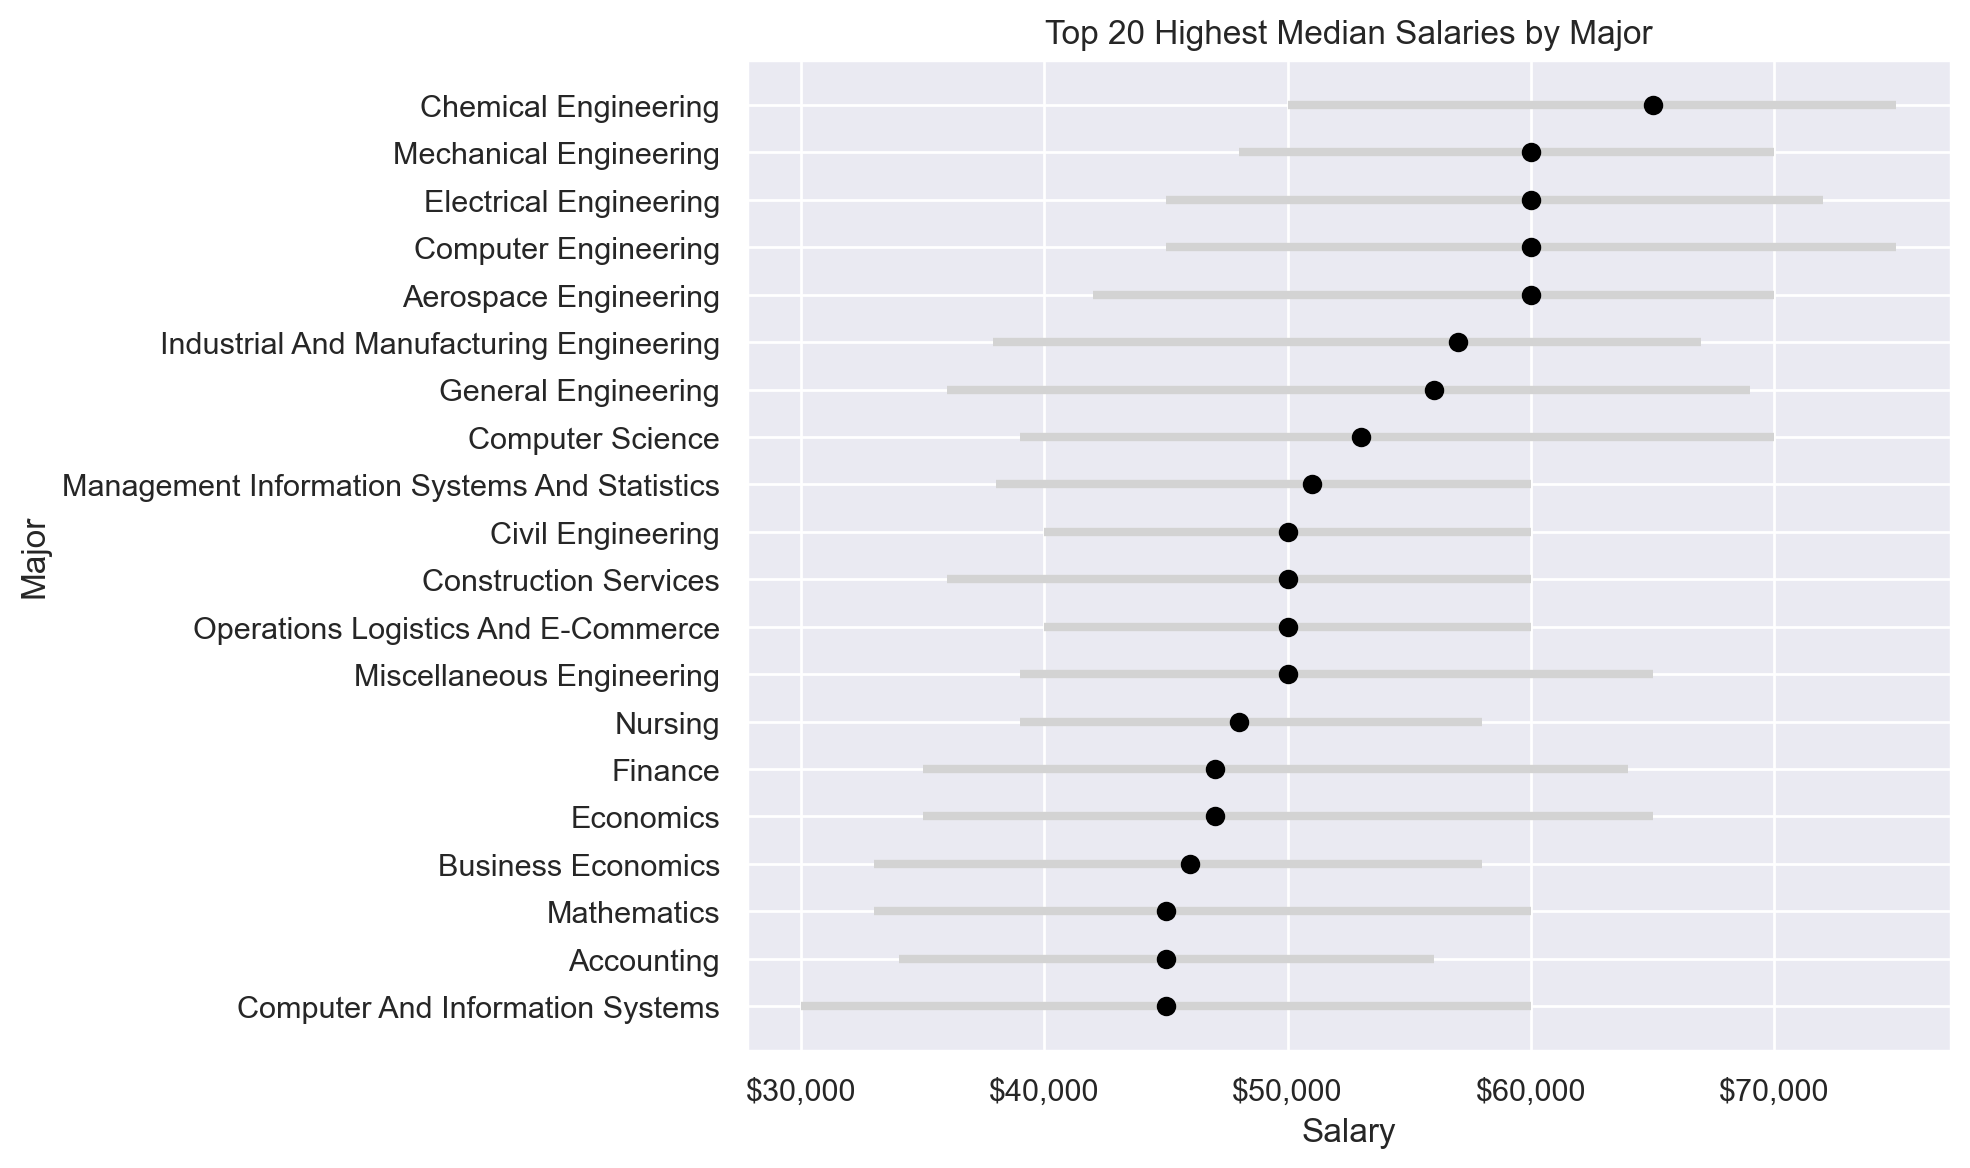

In [ ]:
plot_top_n_salaries(df, 20, 100)

## Cleanup

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()